# PART 1

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Import up-to-date project data

combined_data_new = pd.read_pickle('/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis/02 Data/Prepared Data/combined_data_new.pkl')

In [3]:
path = r'/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis'

In [4]:
# Column overview

combined_data_new.head()

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,Number_of_dependants,Marital_status,income
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,196,1,1,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Deleting "First Name","Last Name" columns due to personally identifiable information (PII)

combined_data_new = combined_data_new.drop(columns=['First Name', 'Last Name'])

In [6]:
# Column overview after deleting

combined_data_new.head()

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,loyalty_flag,spending_flag,order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Marital_status,income
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,Loyal Customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,196,1,1,Soda,77,...,Loyal Customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,196,1,1,Soda,77,...,Loyal Customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,196,1,1,Soda,77,...,Loyal Customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,196,1,1,Soda,77,...,Loyal Customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
### ° Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
### ° Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Dictionary mapping states to regions

state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'South',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'} 

In [8]:
# Apply mapping to create the 'Region' column

combined_data_new['Region'] = combined_data_new['State'].map(state_to_region)

In [9]:
# checking new region column

combined_data_new['Region'].head()

0    South
1    South
2    South
3    South
4    South
Name: Region, dtype: object

In [10]:
# Checking new size

combined_data_new.shape

(30657347, 24)

In [11]:
combined_data_new['Region'].value_counts(dropna = False)

South        9632791
West         7838932
Midwest      7183053
Northeast    5427268
NaN           575303
Name: Region, dtype: int64

In [12]:
df_NaN = combined_data_new[combined_data_new['Region'].isnull() == True]

In [13]:
df_NaN

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,spending_flag,order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependants,Marital_status,income,Region
6161,1345781,1131,4,14,NaN,196,2,0,Soda,77,...,Low spender,Non-frequent customer,Female,District of Columbia,26,8/8/2018,0,single,64864,NaN
6162,318377,1131,3,15,5.0,43867,3,0,100% Grated Parmesan Cheese,21,...,High spender,Frequent customer,Female,District of Columbia,26,8/8/2018,0,single,64864,NaN
6163,1104641,1131,4,17,18.0,43867,3,1,100% Grated Parmesan Cheese,21,...,High spender,Non-frequent customer,Female,District of Columbia,26,8/8/2018,0,single,64864,NaN
6164,3415136,1131,5,11,8.0,23915,1,0,Uncrustables Peanut Butter & Grape Jelly Sandwich,38,...,Low spender,Frequent customer,Female,District of Columbia,26,8/8/2018,0,single,64864,NaN
6165,1104641,1131,4,17,18.0,23915,4,1,Uncrustables Peanut Butter & Grape Jelly Sandwich,38,...,Low spender,Non-frequent customer,Female,District of Columbia,26,8/8/2018,0,single,64864,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30657064,2543406,73704,3,12,21.0,35470,1,1,Water Mineral,115,...,Low spender,Non-frequent customer,Male,District of Columbia,28,2/6/2017,2,married,31792,NaN
30657065,2529944,73704,3,16,21.0,35470,1,1,Water Mineral,115,...,Low spender,Non-frequent customer,Male,District of Columbia,28,2/6/2017,2,married,31792,NaN
30657066,899171,73704,2,11,20.0,35470,1,1,Water Mineral,115,...,Low spender,Non-frequent customer,Male,District of Columbia,28,2/6/2017,2,married,31792,NaN
30657067,1381485,73704,1,10,20.0,35470,1,1,Water Mineral,115,...,Low spender,Non-frequent customer,Male,District of Columbia,28,2/6/2017,2,married,31792,NaN


### It can be observed that there exist some NaN values, affiliated to the District of Columbia (DC). Since we are focused on the creation of only regions, we would have to drop DC values since it does not belong to a specific geographical region in the USA.

In [14]:
# Dropping the NaN values from the 'DC' in Region column

Df_clean = combined_data_new[combined_data_new['Region'].isnull() == False]

In [15]:
# Checking new shape size

Df_clean.shape

(30082044, 24)

In [16]:
Df_clean['Region'].value_counts(dropna = False)

South        9632791
West         7838932
Midwest      7183053
Northeast    5427268
Name: Region, dtype: int64

In [17]:
# create crosstab to compare spending habits
crosstab = pd.crosstab(Df_clean['Region'], Df_clean['spending_flag'], dropna = False)

In [18]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,1467810,5715243
Northeast,1107942,4319326
South,1975176,7657615
West,1599282,6239650


## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
print(Df_clean.columns)

Index(['order_id', 'user_id', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag',
       'Gender', 'State', 'Age', 'date_joined', 'Number_of_dependants',
       'Marital_status', 'income', 'Region'],
      dtype='object')


In [20]:
print(Df_clean)

          order_id  user_id  orders_day_of_week  order_hour_of_day  \
0          2539329        1                   2                  8   
1          2398795        1                   3                  7   
2           473747        1                   3                 12   
3          2254736        1                   4                  7   
4           431534        1                   4                 15   
...            ...      ...                 ...                ...   
30657342    156685   106143                   4                 23   
30657343    484769    66343                   6                 11   
30657344   1561557    66343                   1                 11   
30657345    276317    66343                   6                 15   
30657346   2922475    66343                   1                 12   

          days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            NaN         196                  1          0   
1  

In [21]:
# Assuming that 'income' column indicates the revenue generated by each customer
# Defining activity metric 

Df_clean['activity'] = Df_clean['income']  

/var/folders/0t/gxfdtndd2xn40qsj951m42n80000gn/T/ipykernel_75359/1084958934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_clean['activity'] = Df_clean['income']


In [22]:
# Define a threshold for low activity 

low_activity_threshold = 5 

In [23]:
# Create a copy of the DataFrame to avoid the warning

Df_clean_filtered = Df_clean.copy()

In [24]:
# Create an exclusion flag column based on activity threshold using .loc

Df_clean_filtered.loc[:, 'exclusion_flag'] = Df_clean_filtered['activity'] < low_activity_threshold

In [25]:
# Filter out low-activity customers

Df_clean_filtered = Df_clean_filtered[Df_clean_filtered['exclusion_flag'] == False]

In [26]:
Df_clean_filtered.shape

(30082044, 26)

In [27]:
# Export the filtered data to a new pickle file

Df_clean_filtered.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','low_activity_dataset.pkl'))

### Normally, order_number was supposed to determine the threshold but since in the previous exercise, it was been dropped, i decided to use the revenue data for customers to determine the activity.

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [28]:
Df_new = pd.read_pickle('/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis/02 Data/Prepared Data/low_activity_dataset.pkl')

In [29]:
Df_new['Age'].describe()

count    3.008204e+07
mean     4.947397e+01
std      1.848070e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [30]:
# Create a new column 'Customer_Profile' using.loc (Age_group, income_group and department_group )

Df_new.loc[Df_new['Age'] >=60, 'age_group'] = 'Older Age'
Df_new.loc[(Df_new['Age'] >35) & (Df_new['Age'] <60), 'age_group'] = 'Middle Age'
Df_new.loc[Df_new['Age'] <=35, 'age_group'] = 'Young Age'

In [31]:
Df_new['age_group'].value_counts(dropna=False)

Middle Age    11334388
Older Age     10269900
Young Age      8477756
Name: age_group, dtype: int64

In [32]:
Df_new['income'].describe()

count    3.008204e+07
mean     9.943214e+04
std      4.307151e+04
min      2.590300e+04
25%      6.703300e+04
50%      9.658100e+04
75%      1.279380e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
# create new column for income groups using .loc

Df_new.loc[Df_new['income'] >=99676, 'income_group'] = '> mean income'
Df_new.loc[Df_new['income'] <=99675, 'income_group'] = '< mean income'

In [34]:
Df_new['income_group'].value_counts(dropna=False)

< mean income    16204920
> mean income    13877124
Name: income_group, dtype: int64

In [35]:
Df_new['Number_of_dependants'].describe()

count    3.008204e+07
mean     1.501367e+00
std      1.118402e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_of_dependants, dtype: float64

In [36]:
# create new column for dependents_group using .loc

Df_new.loc[Df_new['Number_of_dependants']== 0, 'dependent_group'] = 'Negative'
Df_new.loc[Df_new['Number_of_dependants'] >0, 'dependent_group'] = 'Positive'

In [37]:
Df_new['dependent_group'].value_counts(dropna=False)

Positive    22566509
Negative     7515535
Name: dependent_group, dtype: int64

In [38]:
Df_new.head(3000)

,order_id,user_id,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,date_joined,Number_of_dependants,Marital_status,income,Region,activity,exclusion_flag,age_group,income_group,dependent_group
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,2/17/2019,3,married,40423,South,40423,False,Young Age,< mean income,Positive
1,2398795,1,3,7,15.0,196,1,1,Soda,77,...,2/17/2019,3,married,40423,South,40423,False,Young Age,< mean income,Positive
2,473747,1,3,12,21.0,196,1,1,Soda,77,...,2/17/2019,3,married,40423,South,40423,False,Young Age,< mean income,Positive
3,2254736,1,4,7,29.0,196,1,1,Soda,77,...,2/17/2019,3,married,40423,South,40423,False,Young Age,< mean income,Positive
4,431534,1,4,15,28.0,196,1,1,Soda,77,...,2/17/2019,3,married,40423,South,40423,False,Young Age,< mean income,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2942384,290,6,11,7.0,35759,18,1,"Home Delights Dog Food, Beef Stew Flavor",40,...,5/18/2019,1,married,55550,Midwest,55550,False,Young Age,< mean income,Positive
2996,767375,290,0,10,9.0,35759,31,1,"Home Delights Dog Food, Beef Stew Flavor",40,...,5/18/2019,1,married,55550,Midwest,55550,False,Young Age,< mean income,Positive
2997,44163,290,5,19,6.0,35759,43,1,"Home Delights Dog Food, Beef Stew Flavor",40,...,5/18/2019,1,married,55550,Midwest,55550,False,Young Age,< mean income,Positive
2998,2414530,290,6,11,7.0,35759,20,1,"Home Delights Dog Food, Beef Stew Flavor",40,...,5/18/2019,1,married,55550,Midwest,55550,False,Young Age,< mean income,Positive


# 6. Create an appropriate visualization to show the distribution of profiles.

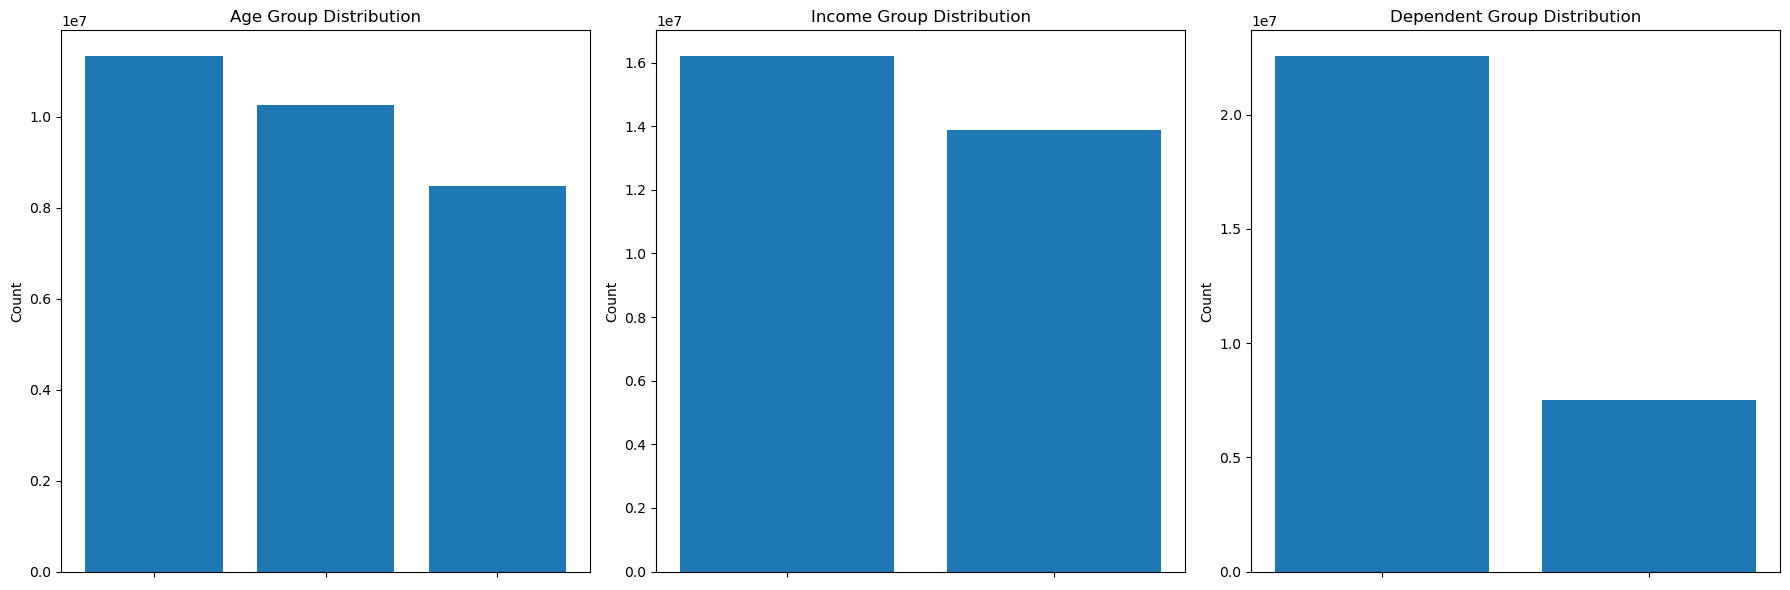

Visualization exported to /Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis/04 Analysis/Visualizations/distribution_visualization.png


In [39]:
# Creating bar chart Visualization of customer profiles

age_group_data = {'Middle Age': 11334388, 'Older Age': 10269900, 'Young Age': 8477756}
income_group_data = {'< mean income': 16204920, '> mean income': 13877124}
dependent_group_data = {'Positive': 22566509, 'Negative': 7515535}

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for age_group
age_axes = axes[0]
age_axes.bar(age_group_data.keys(), age_group_data.values())
age_axes.set_title('Age Group Distribution')
age_axes.set_ylabel('Count')

# Plot for income_group
income_axes = axes[1]
income_axes.bar(income_group_data.keys(), income_group_data.values())
income_axes.set_title('Income Group Distribution')
income_axes.set_ylabel('Count')

# Plot for dependent_group
dependent_axes = axes[2]
dependent_axes.bar(dependent_group_data.keys(), dependent_group_data.values())
dependent_axes.set_title('Dependent Group Distribution')
dependent_axes.set_ylabel('Count')

# Rotate x-axis labels for better visibility
for ax in [age_axes, income_axes, dependent_axes]:
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# Exporting the visualization to an image file 
output_filename = output_filename = '/Users/yukbuinnemtat/Desktop/30-07-2023 Instacart Basket Analysis/04 Analysis/Visualizations/distribution_visualization.png'

plt.savefig(output_filename)

plt.show()

print(f"Visualization exported to {output_filename}")


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [40]:
# Creating customer profiles for parents (young, old and middle aged) using .loc

Df_new.loc[(Df_new['age_group'] == 'Older Age') & (Df_new['dependent_group'] == 'Positive'), 'parent_profile'] = 'Older Parent'
Df_new.loc[(Df_new['age_group'] == 'Middle Age') & (Df_new['dependent_group'] == 'Positive'), 'parent_profile'] = 'Middle Aged Parent'
Df_new.loc[(Df_new['age_group'] == 'Young Age') & (Df_new['dependent_group'] == 'Positive'), 'parent_profile'] = 'Younger Parent'

In [41]:
# Creating customer profiles for non parents (young, old and middle aged) using .loc

Df_new.loc[(Df_new['age_group'] == 'Older Age') & (Df_new['dependent_group'] == 'Negative'), 'parent_profile'] = 'Older_No child'
Df_new.loc[(Df_new['age_group'] == 'Middle Age') & (Df_new['dependent_group'] == 'Negative'), 'parent_profile'] = 'Middle Aged_No child'
Df_new.loc[(Df_new['age_group'] == 'Young Age') & (Df_new['dependent_group'] == 'Negative'), 'parent_profile'] = 'Younger_No child'

In [42]:
# Checking the customer profile created

Df_new['parent_profile'].value_counts(dropna=False)

Middle Aged Parent      8497090
Older Parent            7694981
Younger Parent          6374438
Middle Aged_No child    2837298
Older_No child          2574919
Younger_No child        2103318
Name: parent_profile, dtype: int64

In [43]:
# Aggregating the Number_of_dependants based on max, mean and min variables.

Df_new.groupby('Marital_status').agg({'Number_of_dependants':['min', 'mean', 'max']})

Number_of_dependants              
                                                  min      mean max
Marital_status                                                     
divorced/widowed                                    0  0.000000   0
living with parents and siblings                    1  1.986057   3
married                                             1  2.002423   3
single                                              0  0.000000   0

In [44]:
# Aggregating the age_group to prices based on max, mean and min variables.

Df_new.groupby('age_group').agg({'prices':['min', 'mean', 'max']})

prices                    
              min       mean      max
age_group                            
Middle Age    1.0  12.046312  99999.0
Older Age     1.0  11.680517  99999.0
Young Age     1.0  12.052896  99999.0

In [45]:
# Aggregating the parent_profile to prices based on max, mean and min variables.

Df_new.groupby('parent_profile').agg({'prices':['min', 'mean', 'max']})

prices                    
                        min       mean      max
parent_profile                                 
Middle Aged Parent      1.0  11.842814  99999.0
Middle Aged_No child    1.0  12.655745  99999.0
Older Parent            1.0  11.720640  99999.0
Older_No child          1.0  11.560615  99999.0
Younger Parent          1.0  11.958955  99999.0
Younger_No child        1.0  12.337601  99999.0

## Q8 & Q9. Compare your customer profiles with regions and departments, identifying link between them through visualization charts, illustrating their different behaviors across regions, which could make the information important.

In [46]:
# Grouping parent_profile and Region

Grouped_PR = Df_new.groupby(['parent_profile', 'Region']).size().unstack().fillna(0)

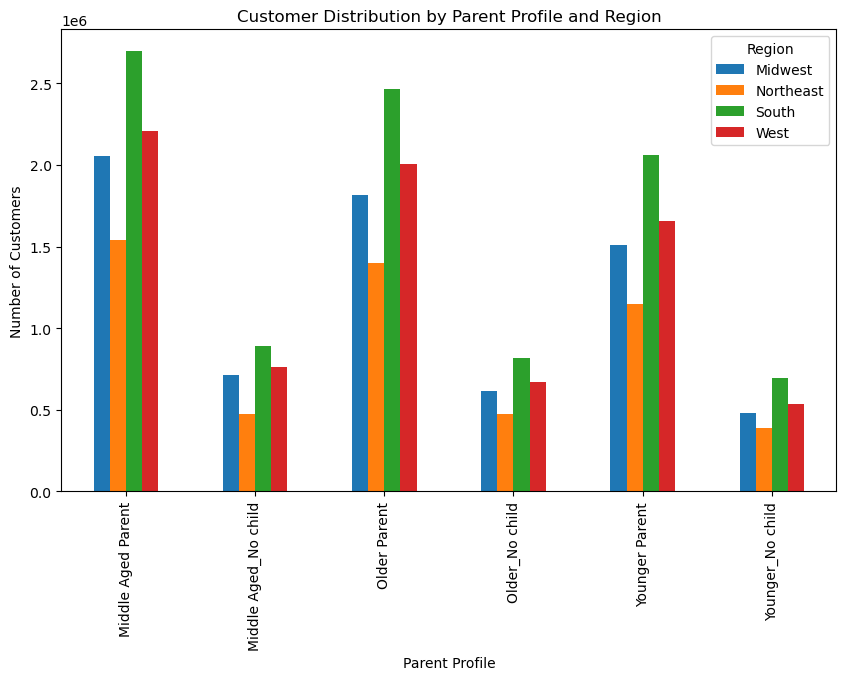

In [47]:
# Create a bar graph to illustrate comparism

Grouped_PR.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Distribution by Parent Profile and Region')
plt.xlabel('Parent Profile')
plt.ylabel('Number of Customers')
plt.legend(title='Region')

# Saving the plot as an image file

output_path = os.path.join(path, '04 Analysis', 'Visualizations')
output_filename = 'customer_distribution_PR_R.png'
plt.savefig(os.path.join(output_path, output_filename))

plt.show()

#### * Diversity of Parent Profiles: In each region, we see varying proportions of different parent profiles. This suggests that customers' roles as parents may play a role in their purchasing behaviors or preferences.

#### * Regional Variations: The distribution of parent profiles is not consistent across regions. Certain profiles might be more prevalent in specific regions. This hints at the possibility of regional factors influencing customers' preferences.

#### * Behavioral Patterns: If we delve deeper into these profiles, we might uncover behavioral patterns. For instance, if 'High Spender' profiles are more common in a particular region, it could indicate a higher average spending capacity among customers in that area.

#### * Marketing Opportunities: Understanding these differences can guide marketing strategies. Tailoring marketing campaigns based on regional preferences and customer profiles could yield higher engagement and conversion rates.

#### * Operational Considerations: Operational teams could also benefit from this information. If certain profiles are more prevalent in specific regions, it might impact inventory management, product assortment, or service offerings.

In [48]:
# Grouping parent_profile and Departments

Grouped_PF_DP = Df_new.groupby(['parent_profile', 'department_id']).size().unstack().fillna(0)

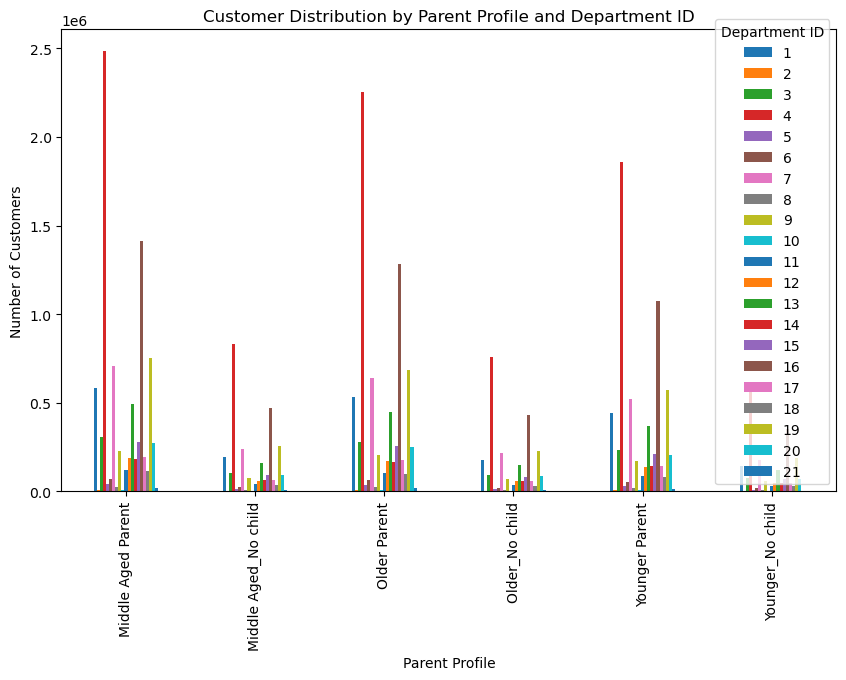

In [49]:
# Create a bar graph to illustrate comparism

Grouped_PF_DP.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Distribution by Parent Profile and Department ID')
plt.xlabel('Parent Profile')
plt.ylabel('Number of Customers')
plt.legend(title='Department ID')

# Saving the plot as an image file

output_path = os.path.join(path, '04 Analysis', 'Visualizations')
output_filename = 'customer_distribution_PF_DP.png'
plt.savefig(os.path.join(output_path, output_filename))

plt.show()

### By observing the resulting bar graph, we can glean several insights:

#### *Segmentation by Department: The graph visualizes how customers with different parent profiles are distributed across various departments. This segmentation might reveal which parent profiles are more likely to engage with specific departments.

#### *Behavioral Clusters: If certain parent profiles tend to cluster around particular department, it suggests that customers with similar behaviors or preferences gravitate towards related services or products.

#### *Marketing Strategies: The insights gained from this analysis can guide targeted marketing strategies. If 'High Spender' profiles are frequently associated with a specific department, marketers can tailor campaigns to appeal to this group's preferences.

#### *Resource Allocation: Operational decisions related to resource allocation, inventory management, and customer support can be influenced by these insights. For instance, departments with high customer concentration might require extra attention.

## 10. Tidy up your script, export your final data set, and save your notebook.

In [ ]:
Df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Df_Final_Data.pkl'))